Assigment_3_PCA: Apply Principal Component Analysis on Wine and Breast_Cancer Datasets in Scikit learn and justify your results. Attached is the jupyter notebook for PCA on Breast cancer dataset.

In [97]:
#Import required libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import missingno as mno
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [98]:
# Import Wine and Breast_Cancer datasets
# Import Wine datasets as "wine"
from sklearn.datasets import load_wine
wine = load_wine()

# Import Breast_Cancer datasets as "cancer"
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()



In [99]:
#Check the description of datasets
# Check the wine dataset
print("The information of wine data")
print(wine.keys())
print(wine['DESCR'])

#Check the cancer dataset
print("The information of breast cancer data")
print(cancer.keys())
print(cancer['DESCR'])

The information of wine data
dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names'])
.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:      

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   alcohol                       178 non-null    float64
 1   malic_acid                    178 non-null    float64
 2   ash                           178 non-null    float64
 3   alcalinity_of_ash             178 non-null    float64
 4   magnesium                     178 non-null    float64
 5   total_phenols                 178 non-null    float64
 6   flavanoids                    178 non-null    float64
 7   nonflavanoid_phenols          178 non-null    float64
 8   proanthocyanins               178 non-null    float64
 9   color_intensity               178 non-null    float64
 10  hue                           178 non-null    float64
 11  od280/od315_of_diluted_wines  178 non-null    float64
 12  proline                       178 non-null    float64
dtypes: fl

None

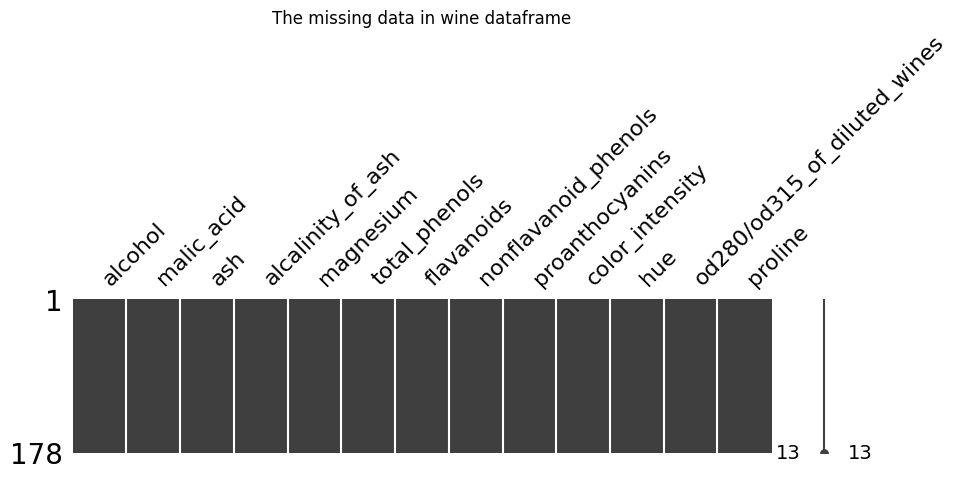

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

None

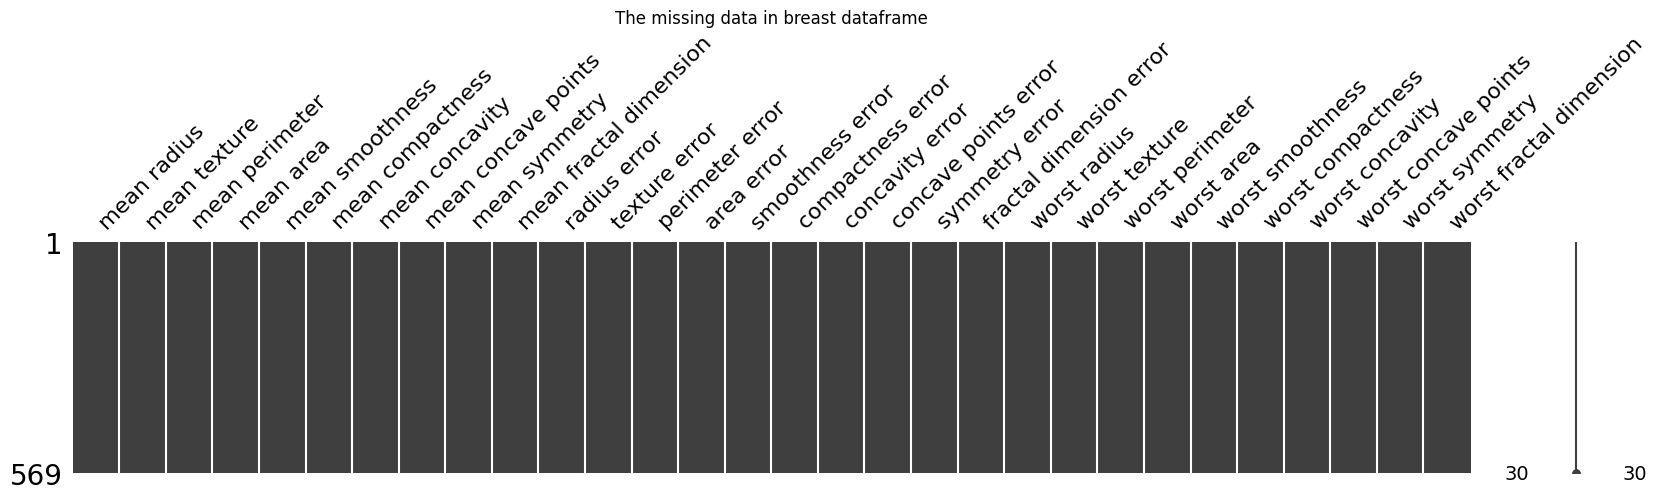

In [101]:
#Create two dataframes, one containing the "breast_cancer" data and the other containing the "wine" data
df_wine = pd.DataFrame(wine['data'],columns=wine['feature_names'])
df_cancer = pd.DataFrame(cancer['data'],columns=cancer['feature_names'])

#Check the infomation of these two dataframes as well as the null value
display(df_wine.info())
mno.matrix(df_wine, figsize = (10, 2))
plt.title("The missing data in wine dataframe")
plt.show()


display(df_cancer.info())
mno.matrix(df_cancer, figsize = (20, 3))
plt.title("The missing data in breast dataframe")
plt.show()

Both dataframes, "df_breast_cancer" and "df_wine," have complete data with no missing values. Consequently, we can proceed with the downstream analysis.

1. We use the PCA to do the linear dimension reduction. I will do this by using the wine data first.

In [65]:
# Standardize the data of the features
scaler=StandardScaler()
scaler.fit(df_wine)
scaled_data_wine =scaler.transform(df_wine)
display(scaled_data_wine)



array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [102]:
# Use the PCA tech to fit the data. I will try to use 3 principal components decomposition of the 13 features
pca_wine=PCA(n_components=3)
pca_wine.fit(scaled_data_wine)
x_pca_wine = pca_wine.transform(scaled_data_wine)


#Check the column number before and after PCA
print("The shape of wine data before PCA")
display(scaled_data_wine.shape)

print("-----------------------------------")
print("The shape of wine data after PCA")
display(x_pca_wine.shape)

The shape of wine data before PCA


(178, 13)

-----------------------------------
The shape of wine data after PCA


(178, 3)

The explained variation per principal component for the wine data is: [0.36198848 0.1920749  0.11123631]
The cumulative explained variation ratio for the wine data is: [0.36198848 0.55406338 0.66529969]
-------------------------------------------------------------------------------------------------------------------------------


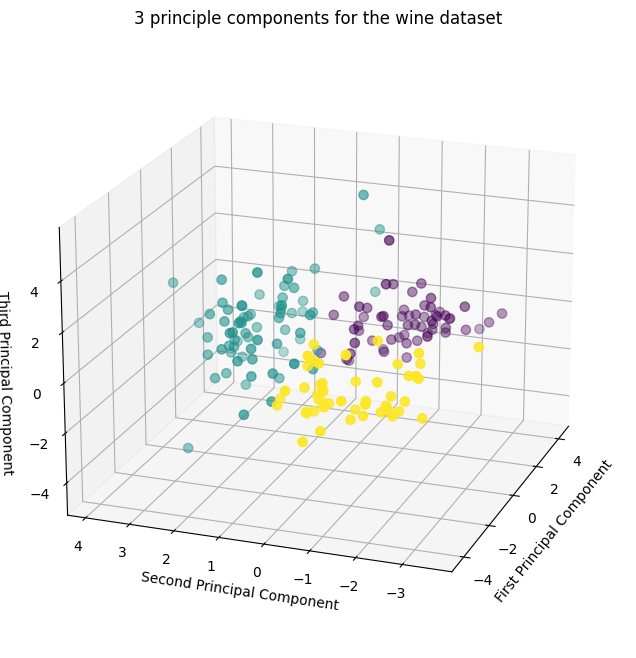

In [105]:
#Plot the 3 principle components and see the explained Variance
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca_wine[:,0], x_pca_wine[:,1], x_pca_wine[:,2], c=wine['target'], cmap='viridis', s=45)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title("3 principle components for the wine dataset")
ax.view_init(20, 200)

#View the explanied variance to justify the results
print('The explained variation per principal component for the wine data is: {}'.format(pca_wine.explained_variance_ratio_))
print('The cumulative explained variation ratio for the wine data is: {}'.format(np.cumsum(pca_wine.explained_variance_ratio_)))
print("-------------------------------------------------------------------------------------------------------------------------------")

 Based on the explained variation, the first principal component explains approximately 36.2% of the total variance, the second principal component explains about 19.2% of the total variance, and the third principal component explains about 11.12% of the total variance in the data. Collectively, these three principal components account for 66.53% of the total variance in the dataset. This suggests that using PCA to reduce the dimensionality of this dataset may not be the most suitable approach since it results in approximately 33.47% loss of total information.

Based on the figure depicting the selected principal components, it appears that the data can cluster fine in the reduced space compared to the original space.

In summary, while PCA can effectively reduce the dimensionality of data by capturing the most significant variation in fewer principal components, using only the top three components in this case leads to a considerable loss of information.

2.Next, we will apply PCA to reduce the dimensionality of the breast cancer dataset.

In [106]:
# Standardize the data of the features
scaler.fit(df_cancer)
scaled_data_cancer =scaler.transform(df_cancer)
display(scaled_data_cancer)

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [107]:
# Use the PCA tech to fit the data. I will use 3 principal components decomposition of the 30 features too.
pca_cancer=PCA(n_components=3)
pca_cancer.fit(scaled_data_cancer)
x_pca_cancer = pca_cancer.transform(scaled_data_cancer)

#Check the column number before and after PCA
print("The shape of breast cancer data before PCA")
display(scaled_data_cancer.shape)

print("-----------------------------------")
print("The shape of breast cancer data after PCA")
display(x_pca_cancer.shape)

The shape of breast cancer data before PCA


(569, 30)

-----------------------------------
The shape of breast cancer data after PCA


(569, 3)

The explained variation per principal component for the breast cancer data is: [0.44272026 0.18971182 0.09393163]
The cumulative explained variation ratio for the breast cancer data is : [0.44272026 0.63243208 0.72636371]
-------------------------------------------------------------------------------------------------------------------------------


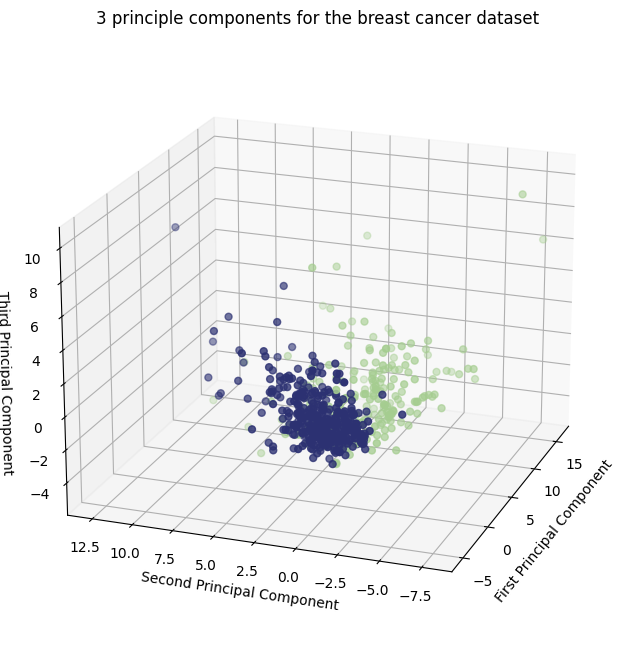

In [108]:
#Plot the 3 principle components and see the explained Variance
fig = plt.figure(figsize=(15, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(x_pca_cancer[:,0], x_pca_cancer[:,1], x_pca_cancer[:,2], c=cancer['target'], cmap='crest', s=25)
ax.set_xlabel('First Principal Component')
ax.set_ylabel('Second Principal Component')
ax.set_zlabel('Third Principal Component')
ax.set_title("3 principle components for the breast cancer dataset")
ax.view_init(20, 200)

#View the explanied variance to justify the results
print('The explained variation per principal component for the breast cancer data is: {}'.format(pca_cancer.explained_variance_ratio_))
print('The cumulative explained variation ratio for the breast cancer data is : {}'.format(np.cumsum(pca_cancer.explained_variance_ratio_)))
print("-------------------------------------------------------------------------------------------------------------------------------")

Based on the explained variation, the first principal component explains approximately 44.27% of the total variance, the second principal component explains about 18.97% of the total variance, and the third principal component explains about 9.39% of the total variance in the data. Collectively, these three principal components account for 72.64% of the total variance in the dataset. This suggests that using PCA to reduce the dimensionality of this dataset may not be the most suitable approach since it results in approximately 27.36% loss of total information. While this result is a little bit better than the PCA result for the wine data, it still indicates a substantial loss of information.

Based on the figure depicting the selected principal components, it appears challenging to separate the data effectively in the reduced space compared to the original space. And the third component did not explaine too much of the total variance. To gain better insights into the data's structure, I will redo the PCA with n_components = 2 and plot the data after PCA.

The explained variation per principal component for the breast cancer data is: [0.44272026 0.18971182]
The cumulative explained variation ratio for the breast cancer data is : [0.44272026 0.63243208]
-------------------------------------------------------------------------------------------------------------------------------


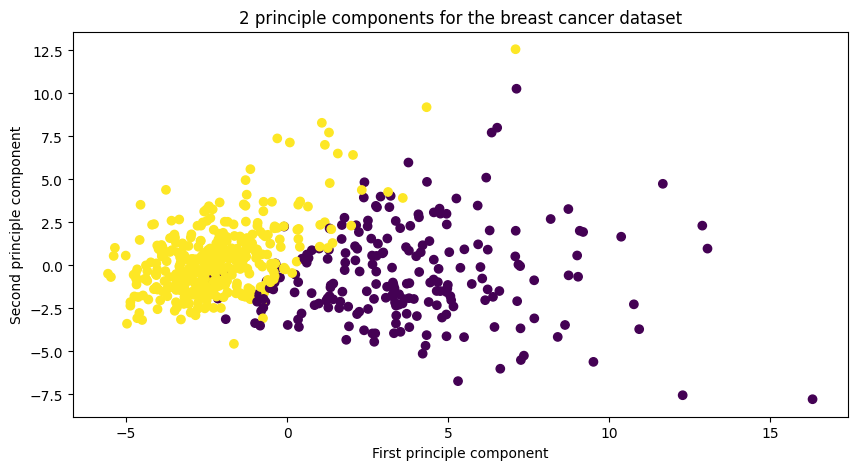

In [110]:
# I used 2 principal components decomposition of the 30 features
pca_cancer_2=PCA(n_components=2)
pca_cancer_2.fit(scaled_data_cancer)
x_pca_cancer_2 = pca_cancer_2.transform(scaled_data_cancer)

#Plot the data
fig = plt.figure(figsize=(10, 5))
plt.scatter(x_pca_cancer_2[:,0],x_pca_cancer_2[:,1],c=cancer['target'])
plt.xlabel('First principle component')
plt.ylabel('Second principle component')
plt.title("2 principle components for the breast cancer dataset")


#View the explanied variance to justify the results
print('The explained variation per principal component for the breast cancer data is: {}'.format(pca_cancer_2.explained_variance_ratio_))
print('The cumulative explained variation ratio for the breast cancer data is : {}'.format(np.cumsum(pca_cancer_2.explained_variance_ratio_)))
print("-------------------------------------------------------------------------------------------------------------------------------")

Based on the explained variation, the first principal component explains approximately 44.27% of the total variance, the second principal component explains about 18.97% of the total variance. These two principal components account for 63.24% of the total variance in the dataset. This suggests that using PCA to reduce the dimensionality of this dataset results in approximately 36.76% loss of total information.